# Project 2
## Members
* Ethan Kamus
* Nathaniel Marquez
* Rebecca Lee

# Experiment 1

In [146]:
import numpy as np
import matplotlib.pyplot as plt
data = np.loadtxt('dataset.csv',delimiter=',',skiprows=1)

# Experiment 2

In [147]:
training_set = data[0:900]
test_set = data[900:1000]

len(training_set), len(test_set)

(900, 100)

# Experiment 3

In [148]:
# convert training set to 2D array and 
training_set = np.array(training_set)
# create x1 and x2 vectors
x1 = training_set[0:900,[0]]
x2 = training_set[0:900,[1]]
# create feature vector with ones column and x1, x2 attributes
X = np.hstack((np.ones_like(x1),x1,x2))
# target column vector
t = training_set[0:900,[2]] # matrix of output?
t = t.reshape(900,)

# differentiate with respect to w to get following optimal weight values
XX = np.dot(X.T,X)
inverse_XX = np.linalg.inv(XX)
Xt = np.dot(X.T,t)
w = np.dot(inverse_XX,Xt)

w

array([0.69333661, 0.03664626, 0.02839225])

$$ y = 0.65683428 - 0.00632862x_1 - 0.00483534x_2$$

# Experiment 4

In [149]:
w_0 = w[0]
w_1 = w[1]
w_2 = w[2]
# X = arr[0:900,[1,2]]
predictions = []
for i in X:
    predictions = np.append(predictions, [[w_0 + (i[0]*w_1) + (i[1]*w_2)]])
#     predictions.append(np.array([w_0 + (i[0]*w_1) + (i[1]*w_2)]))
loss = t - predictions
loss = np.square(loss)
avg_sq_loss = np.sum(loss)/len(loss)
avg_sq_loss

8.599408015247962

MSE: 0.1903883621895976

# Experiment 5

In [150]:
# X = np.hstack((np.ones_like(x1),x1,x2))
X = np.hstack((np.ones_like(x1),x1,x2, np.square(x1), np.square(x2)))
XX = np.dot(X.T,X)
inverse_XX = np.linalg.inv(XX)
Xt = np.dot(X.T,t)
wq = np.dot(inverse_XX,Xt)

wq_0 = wq[0]
wq_1 = wq[1]
wq_2 = wq[2]
wq_12 = wq[3]
wq_22 = wq[4]

predictions5 = []
for i in X:
    predictions5 = np.append(predictions5, [[wq_0 + (i[1]*wq_1) 
                                     + (i[2]*wq_2) 
                                     + ((i[3])*wq_12) 
                                     + ((i[4])*wq_22)]])
loss = t - predictions5
loss = np.square(loss)
avg_sq_loss = np.sum(loss)/len(loss)
avg_sq_loss

8.587120688069552

$$ y = 0.31183988 - 0.00377483x_1 + 0.00781421x_2 + 0.17753899x_1^2 + 0.08813606x_2^2 $$

MSE: 0.1544028141884278

# Experiment 6

In [151]:
test_set = np.array(test_set)
x1 = test_set[0:,[0]] # matrix of features?
x2 = test_set[0:,[1]]
t = test_set[0:,[2]]
t = t.reshape(100,)

X = np.hstack((np.ones_like(x1),x1,x2))

# linear
lin_predictions = []
for i in X:
    lin_predictions = np.append(lin_predictions, [[w_0 + (i[0]*w_1) + (i[1]*w_2)]])
loss = t - lin_predictions
loss = np.square(loss)
test_mse = np.sum(loss)/len(loss)

# quadratic
X = np.hstack((X, np.square(x1), np.square(x2)))
quad_predictions = []
for i in X:
    quad_predictions = np.append(quad_predictions, [[wq_0 + (i[1]*wq_1) 
                                     + (i[2]*wq_2) 
                                     + ((i[3])*wq_12) 
                                     + ((i[4])*wq_22)]])
loss = t - quad_predictions
loss = np.square(loss)
test_mse_q = np.sum(loss)/len(loss)
test_mse, test_mse_q

(7.8849120722674755, 7.882170673013778)

# Experiment 7

In [152]:
def calculate_loss(weights, X_vector, t_vector):
    predictions = []
    for i in X_vector:
        temp = 0
        for j in range(int(len(weights))):
            temp = temp + (i[j] * weights[j])
#             print(f'ij ----- {i[j]} * wj ----- {weights[j]} ---- temp {temp}\n\n')
        predictions = np.append(predictions, temp)
    loss = t_vector - predictions
    loss = np.square(loss)
    mse = np.sum(loss)/len(loss)
    return mse

In [153]:
def calculate_weights(order, x1, x2, target_set, isValidation = False):
    X_order = np.ones_like(x1)
    for x in range(1, order+1):
        X_order = np.hstack((X_order, np.power(x1, x), np.power(x2,x)))
    
    if (isValidation):
        return X_order

    XX_order = np.dot(X_order.T,X_order)
    inverse_XX_order = np.linalg.inv(XX_order)
    Xt_order = np.dot(X_order.T,target_set)
    w_order = (np.dot(inverse_XX_order,Xt_order))
    
    
    return w_order, X_order # return as a tuple in python

In [154]:
training_loss = []
validation_loss = []
def cross_validation(order, training_data):
    k = 5
    fold = int(len(training_data) / k)
    
    for i in range(1, order+1):
        j = 0
        test_mse, cv_mse = 0, 0
        for f in range(1, k+1):
            validation = np.array(training_data[int(j*fold):int(f*fold)])
            training = np.delete(training_data, slice(int(j*fold),int(f*fold)), 0)
            valid_x1, valid_x2, valid_t = validation[0:,[0]], validation[0:,[1]], validation[0:,[2]]
            valid_t = valid_t.reshape(valid_t.size)
            
            training_x1, training_x2, training_t = training[0:,[0]], training[0:,[1]], training[0:,[2]]
            training_t = training_t.reshape(training_t.size)
            
            t_results = calculate_weights(i, training_x1, training_x2, training_t)
            weights = t_results[0]
            tX_order = t_results[1]
#             training_loss.append(calculate_loss(weights, tX_order, training_t))

            vX_order = calculate_weights(i, valid_x1, valid_x2, valid_t, isValidation = True)
#             validation_loss.append(calculate_loss(weights, vX_order, valid_t))
            
            test_mse += calculate_loss(weights, tX_order, training_t)
            cv_mse += calculate_loss(weights, vX_order, valid_t)
            j += 1
        training_loss.append(test_mse / k)
        validation_loss.append(cv_mse / k)

In [155]:
cross_validation(8, training_set)
# 'Training Loss Results: ', training_loss , 'Validation Loss Results: ', validation_loss

# Experiment 8

Text(0, 0.5, 'Average MSE')

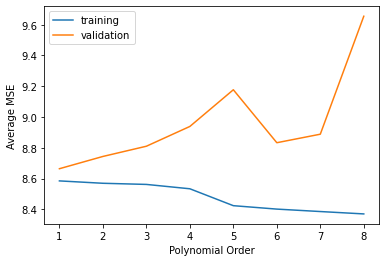

In [156]:
x = np.arange(1,9,1)
line1, = plt.plot(x, training_loss, label='training')
line2, = plt.plot(x, validation_loss, label='validation')
leg = plt.legend(loc='upper left')
plt.xlabel('Polynomial Order')
plt.ylabel('Average MSE')


The point at which the model begins to overfit is at order 4 or 6?

# Experiment 9

In [157]:
# Use the entire training set to fit the best model given the results of experiment (8). What is the equation for this model? Find the final test MSE for this model
x1 = training_set[0:900,[0]]
x2 = training_set[0:900,[1]]
t = training_set[0:900,[2]] 
t = t.reshape(900,)
wt = calculate_weights(4, x1, x2, t, isValidation = False)

# w_o40 = w_o4[0][0]
# w_o41 = w_o4[0][1]
# w_o42 = w_o4[0][2]
# w_o43 = w_o4[0][3]
# w_o44 = w_o4[0][4]
# w_o45 = w_o4[0][5]
# w_o46 = w_o4[0][6]
# w_o47 = w_o4[0][7]
# w_o48 = w_o4[0][8]
w_o4 = wt[0]
print(w_o4)
X = wt[1]


# predictions = []
# for i in X:
#     predictions = np.append(predictions, [[ w_o40 + (i[1]*w) 
#                                      + (i[2]*wq_2) 
#                                      + ((i[3])*wq_12) 
#                                      + ((i[4])*wq_22)]])
loss = calculate_loss(w_o4, X, t)
loss
# avg_sq_loss = np.sum(loss)/len(loss)
# avg_sq_loss

[ 4.80855029e-01  1.80945983e-02  3.47732882e-02  1.05762091e-01
  2.54007635e-02  2.96135677e-03 -2.53846497e-06 -8.12548228e-03
 -6.24993101e-04]


8.569501867701547

$$ y = $$

# Experiment 10

Text(0.5, 0, 'y')

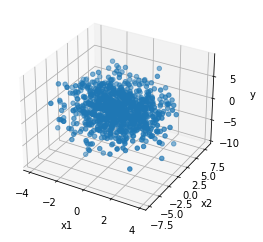

In [158]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(x1,x2,t)
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')

# Experiment 11

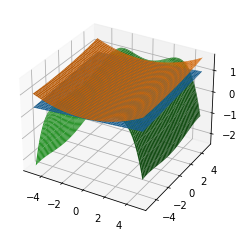

In [159]:
x1_11 = np.linspace(-5,5,100)
x2_11 = np.linspace(-5,5,100)
x,y = np.meshgrid(x1_11,x2_11)

def create_surface_3(x,y):
    return w[0] + w[1] * x + w[2] * y

def create_surface_5(x,y):
    return wq[0] + (x*wq[1]) + (y*wq[2]) + ((x**2)*wq[3]) + ((y**2)*wq[4])

def create_surface_9(x,y):
    return w_o4[0] + (x*w_o4[1]) + (y*w_o4[2]) + ((x**2)*w_o4[3]) + ((y**2)*w_o4[4])+ ((x**3)*w_o4[5]) + ((y**3)*w_o4[6])+ ((x**4)*w_o4[7]) + ((y**4)*w_o4[8])

y3 = create_surface_3(x,y)
y5 = create_surface_5(x,y)
y9 = create_surface_9(x,y)

# # calculate linear
# for i in range(len(x1)):
#     y3 = np.append(y3, [[w[0] + (x1[i]*w[1]) + (x2[i]*w[2])]])

# # calculate quadratic
# for i in range(len(x1)):
#     y5 = np.append(y3, [[wq[0] + (x1[i]*wq[1]) + (x2[i]*wq[2]) + ((x1[i]**2)*wq[3]) + ((x2[i]**2)*wq[4])]])
    
# # calculate order 4
# for i in range(len(x1)):
#     y9 = np.append(y3, [[w_o4[0] + (x1[i]*w_o4[1]) + (x2[i]*w_o4[2]) + ((x1[i]**2)*w_o4[3]) + ((x2[i]**2)*w_o4[4])+ ((x1[i]**3)*w_o4[5]) + ((x2[i]**3)*w_o4[6])+ ((x1[i]**4)*w_o4[7]) + ((x2[i]**4)*w_o4[8])]])

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.plot_surface(x, y, y3)
ax.plot_surface(x, y, y5)
ax.plot_surface(x, y, y9)

  

# Experiment 12

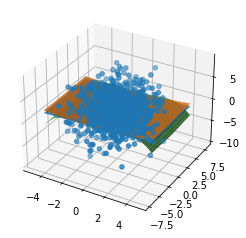

In [160]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(x1,x2,t)
ax.plot_surface(x, y, y3)
ax.plot_surface(x, y, y5)
ax.plot_surface(x, y, y9)